# Case Study on Testing of Hypothesis
A company started to invest in digital marketing as a new way of their product
promotions.For that they collected data and decided to carry out a study on it.

● The company wishes to clarify whether there is any increase in sales after
stepping into digital marketing.

● The company needs to check whether there is any dependency between the
features “Region” and “Manager”.

Help the company to carry out their study with the help of data provided.

In [22]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stat

In [2]:
data = pd.read_csv('Sales_add.csv')

In [10]:
#descriptive analytics on the data set
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [4]:
data.tail()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
17,Month-18,Region - C,Manager - B,167996,191517
18,Month-19,Region - B,Manager - A,132135,227040
19,Month-20,Region - A,Manager - B,152493,212579
20,Month-21,Region - B,Manager - A,147425,263388
21,Month-22,Region - A,Manager - C,130263,243020


In [12]:
data.shape

(22, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [6]:
data.isnull().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [9]:
data.describe(include='all')

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22,22,22,22.000000,22.000000
unique,22,3,3,NaN,NaN
top,Month-1,Region - A,Manager - A,NaN,NaN
freq,1,10,9,NaN,NaN
mean,NaN,NaN,NaN,149239.954545,231123.727273
std,NaN,NaN,NaN,14844.042921,25556.777061
min,NaN,NaN,NaN,130263.000000,187305.000000
25%,NaN,NaN,NaN,138087.750000,214960.750000
50%,NaN,NaN,NaN,147444.000000,229986.500000
75%,NaN,NaN,NaN,157627.500000,250909.000000


In [13]:
data.skew()

Sales_before_digital_add(in $)    0.578033
Sales_After_digital_add(in $)    -0.022669
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x13dd725f910>,
 'caps': [<matplotlib.lines.Line2D at 0x13dd726b070>,
 'boxes': [<matplotlib.lines.Line2D at 0x13dd725f580>],
 'medians': [<matplotlib.lines.Line2D at 0x13dd726b790>],
 'fliers': [<matplotlib.lines.Line2D at 0x13dd726bb20>],
 'means': []}

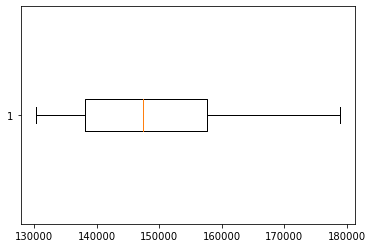

In [17]:
plt.boxplot(data['Sales_before_digital_add(in $)'],vert=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x13dd72cc850>,
 'caps': [<matplotlib.lines.Line2D at 0x13dd72ccfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13dd72cc6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x13dd72d8730>],
 'fliers': [<matplotlib.lines.Line2D at 0x13dd72d8ac0>],
 'means': []}

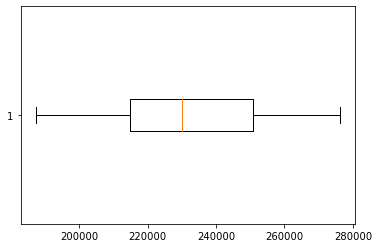

In [18]:
plt.boxplot(data['Sales_After_digital_add(in $)'],vert=0)

In [19]:
data.corr()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
Sales_before_digital_add(in $),1.000000,-0.178668
Sales_After_digital_add(in $),-0.178668,1.000000



Insights :

    1. Sales before digital add is positively skewed.
    
    2. Sales after digital add is slightly negatively skewed.
    
    3. Correlation between sales before digital add & sales after digital add is very low.
    

# 1.The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.


Let,

Null hypothesis ($H_{0}$) :- There is no increase in sales after stepping into digital marketing.
    
Alternative hypothesis ($H_{a}$) :- There is an increase in sales after stepping into digital marketing.
    
set significance level, alpha as 0.05

if p value <0.05, we could reject the Null hypothesis and accept the Alternative hypothesis.

if p value >0.05, we could accept the null hypothesis and reject the Alternative hypothesis.

In [43]:
#calculating p-value using t-test 2-sample paired t-test
ttest,pvalue=stat.ttest_rel(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'],alternative="less")
print(pvalue)

# comparing p-value with significance level 0.05
if pvalue<0.05:
    print("Reject null hypothesis i.e, There is an increase in sales after stepping into digital marketing.")
else:
    print("Accept null hypothesis i.e, There is no increase in sales after stepping into digital marketing.")

3.168333502287889e-11
Reject null hypothesis i.e, There is an increase in sales after stepping into digital marketing.


Since the p-value is less than 0.05, We could reject the null hypothesis. So Ultimately there is an increase in sales after stepping into digital marketing.

# 2.The company needs to check whether there is any dependency between the features “Region” and “Manager”

Let,

Null hypothesis ($H_{0}$) :- Region and Manager are independent.

Alternative hypothesis ($H_{a}$) :- Region and Manager are dependent.

Checking chi-squared independency test between region and manager

In [44]:
data['Manager'].unique()

array(['Manager - A', 'Manager - C', 'Manager - B'], dtype=object)

In [45]:
data['Region'].unique()

array(['Region - A', 'Region - B', 'Region - C'], dtype=object)

In [49]:
#Defining a dictionary
Manager_numb={'Manager - A':1, 'Manager - B':2, 'Manager - C':3}
region_numb={'Region - A':1, 'Region - B':2, 'Region - C':3}

In [51]:
mang_numb=[Manager_numb[values] for values in data.Manager]
mang_numb

[1, 3, 1, 2, 2, 2, 3, 1, 3, 2, 3, 1, 1, 1, 1, 2, 3, 2, 1, 2, 1, 3]

In [52]:
reg_numb=[region_numb[value] for value in data.Region]
reg_numb

[1, 1, 2, 2, 3, 1, 3, 1, 2, 3, 2, 1, 2, 1, 3, 1, 1, 3, 2, 1, 2, 1]

In [53]:
#create a dataframe using the list mang_numb and reg_numb
data_1 = pd.DataFrame(list(zip(mang_numb,reg_numb)),columns=['mang_numb','reg_numb'])
data_1.head()

,mang_numb,reg_numb
0,1,1
1,3,1
2,1,2
3,2,2
4,2,3


In [56]:
#Calculating p- value using chi-Squared test
stat,p,dof,expected=chi2_contingency(data_1)
print('stat=%.3f, p=%.3f' % (stat,p))

# comparing p value with significant level 0.05
if p<0.05: 
    print('The features “Region” and “Manager" are dependent')
else:
    print('The features “Region” and “Manager" are independent')

stat=7.288, p=0.998
The features “Region” and “Manager" are independent


Since the p-value is greater than 0.05, we have to accept the Null hypothesis ($H_{0}$) .That means the features “Region” and “Manager" are independent.